In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
null_values = df.isnull().sum()
print(null_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
col = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[col])

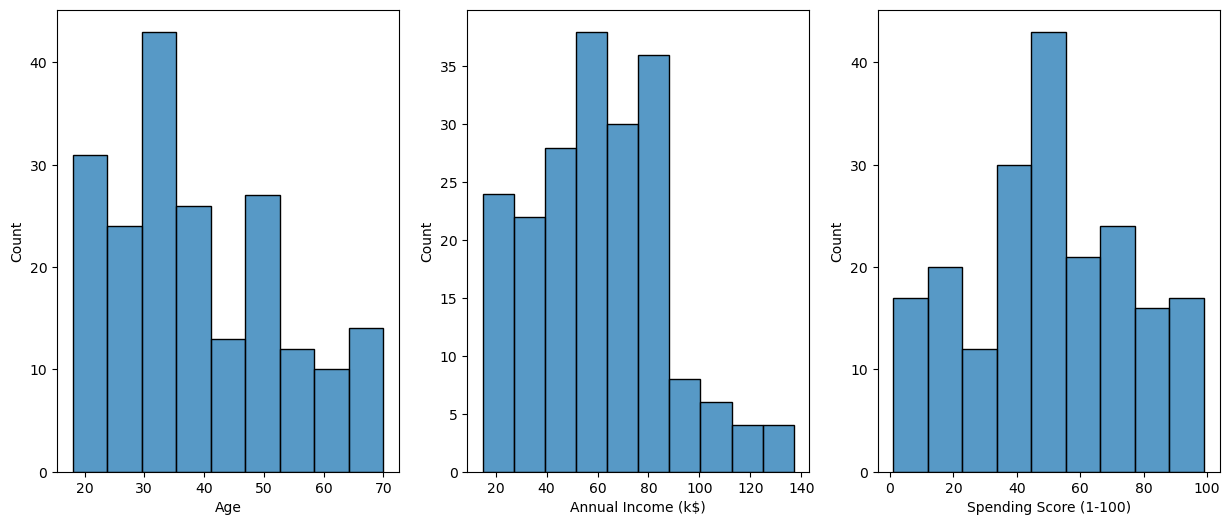

In [11]:
fig, axs = plt.subplots(1,3, figsize = (15,6))
plt1 = sns.histplot(df['Age'] , ax=axs[0])
plt2 = sns.histplot(df['Annual Income (k$)'] , ax=axs[1])
plt3 = sns.histplot(df['Spending Score (1-100)'] , ax=axs[2])

plt.show();

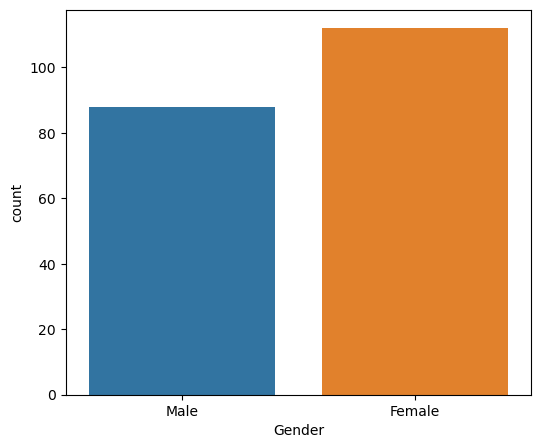

In [12]:
plt.figure(1 , figsize = (6 , 5))
sns.countplot(x = 'Gender' , data = df)
plt.show()

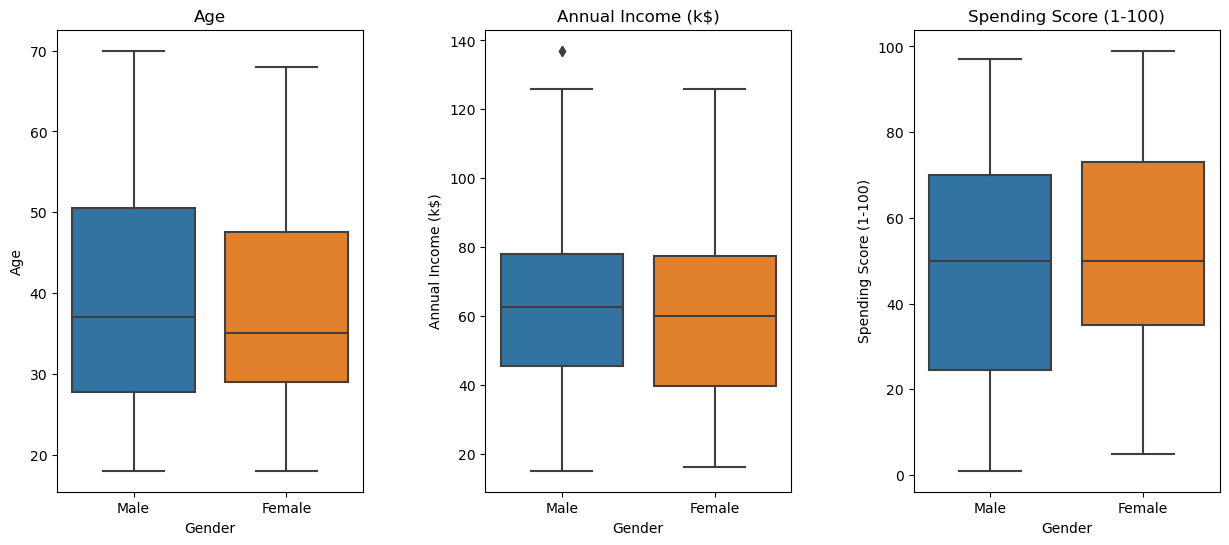

In [13]:
fig, axs = plt.subplots(1,3, figsize = (15,6))
axs = axs.flatten()
for i, ax in zip(col, axs):
    sns.boxplot(x='Gender', y=i, data=df, ax=ax)
    ax.set_title(i)
plt.subplots_adjust(wspace=0.4)

In [14]:
df["Gender"].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

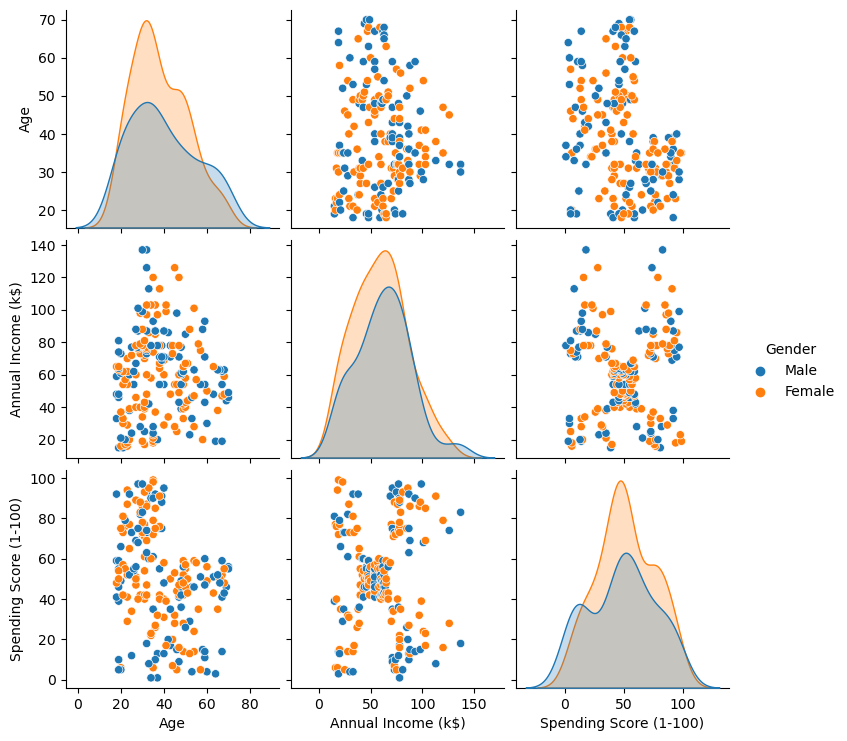

In [15]:
sns.pairplot(df, hue = "Gender")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

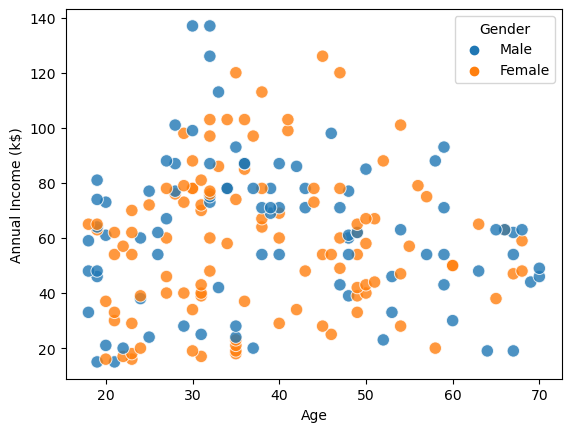

In [16]:
sns.scatterplot(data = df, x = "Age", y = "Annual Income (k$)", s = 80 , alpha = 0.8, hue = "Gender")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

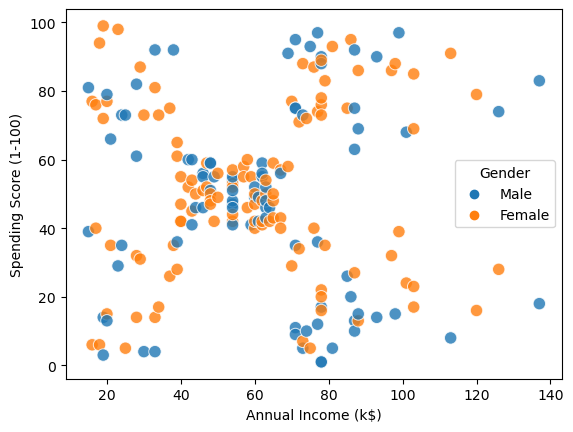

In [17]:
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", s = 80 , alpha = 0.8, hue = "Gender")

In [18]:
df.groupby("Gender").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

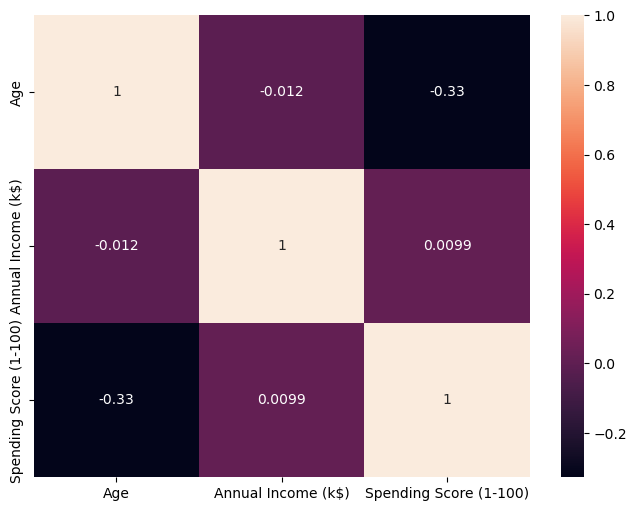

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[col].corr(), annot = True)

In [20]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [21]:
X = df.iloc[:, [2,3]].values

C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

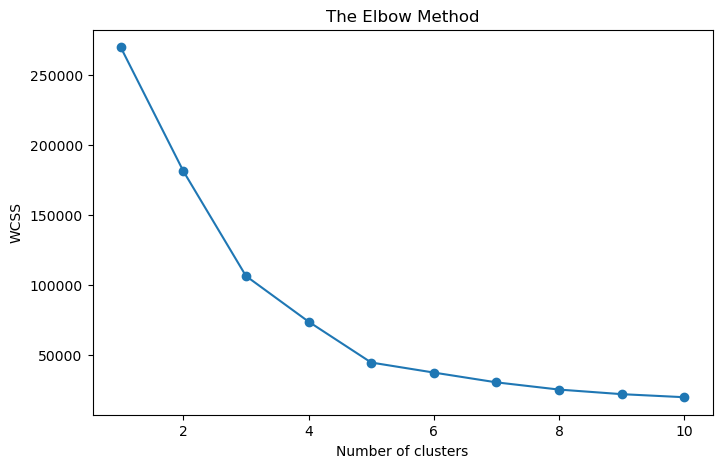

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 100)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
print(X.shape)
print(y_kmeans.shape)

(200, 2)
(200,)


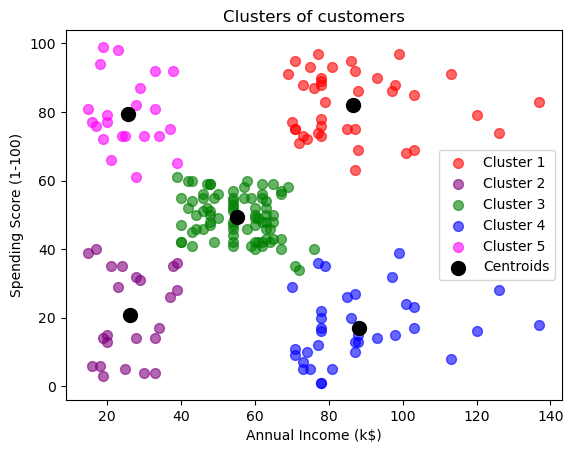

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', alpha=0.6, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'purple', alpha=0.6, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', alpha=0.6, label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'blue', alpha=0.6, label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', alpha=0.6, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')          
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()